## Example H SAF Metop ASCAT SSM DR products

The following example shows how to read and plot H SAF Metop ASCAT SSM data record products using the test data included in the ascat package.

In [1]:
import os
import matplotlib.pyplot as plt
from ascat.h_saf import AscatSsmDataRecord

In [2]:
test_data_path = os.path.join('..', 'tests','ascat_test_data', 'hsaf')
h109_path = os.path.join(test_data_path, 'h109')
h110_path = os.path.join(test_data_path, 'h110')
h111_path = os.path.join(test_data_path, 'h111')
grid_path = os.path.join(test_data_path, 'grid')
static_layer_path = os.path.join(test_data_path, 'static_layer')

h109_dr = AscatSsmDataRecord(h109_path, grid_path, static_layer_path=static_layer_path)
h110_dr = AscatSsmDataRecord(h110_path, grid_path, static_layer_path=static_layer_path)
h111_dr = AscatSsmDataRecord(h111_path, grid_path, static_layer_path=static_layer_path)

A soil moisture time series is read for a specific grid point. The `data` attribute contains a `pandas.DataFrame` object.

In [3]:
gpi = 2501225
h109_ts = h109_dr.read(gpi)

### Time series plots

A simple time series plot of surface soil moisture can be created using `matplotlib`.

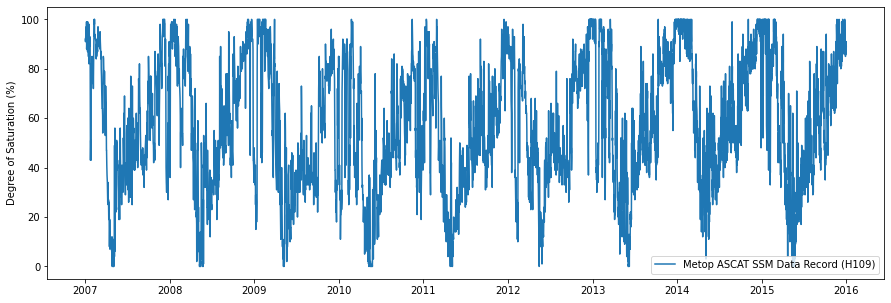

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(h109_ts['sm'], label='Metop ASCAT SSM Data Record (H109)')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()

The SSM data record H109 can be extended using H110, representing a consistent continuation of the data set

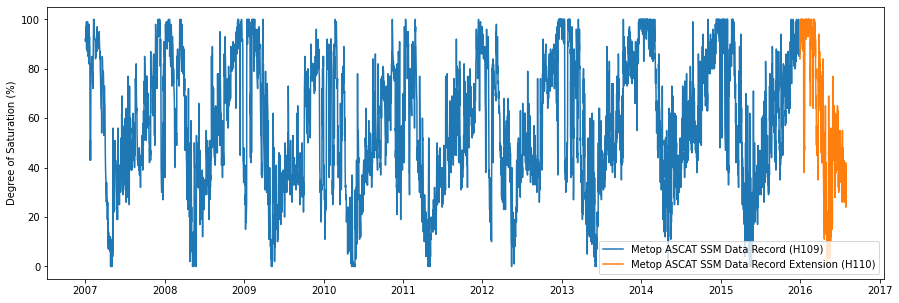

In [5]:
h110_ts = h110_dr.read(gpi)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(h109_ts['sm'], label='Metop ASCAT SSM Data Record (H109)')
ax.plot(h110_ts['sm'], label='Metop ASCAT SSM Data Record Extension (H110)')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()

A soil moisture time series can also be plotted using the plot function provided by the `pandas.DataFrame`. The following example displays several variables stored in the time series.

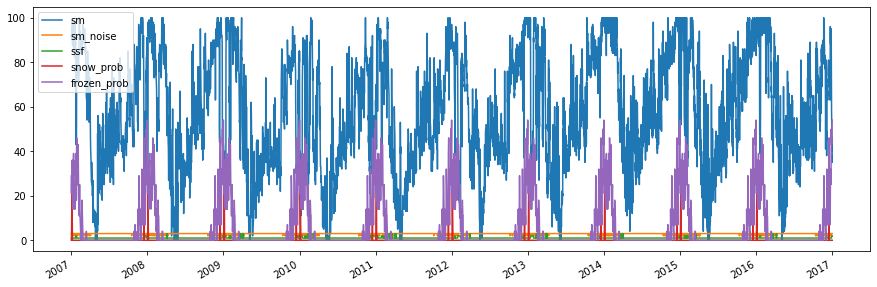

In [6]:
fields = ['sm', 'sm_noise', 'ssf', 'snow_prob', 'frozen_prob']
h111_ts = h111_dr.read(gpi)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
h111_ts[fields].plot(ax=ax)
ax.legend()

### Masking invalid soil moisture measurements

In order to mask invalid/suspicious soil moisture measurements, the confidence flag can be used. It masks soil moisture measurements with a frozen or snow cover probability > 50% and using the Surface State Flag (SSF).

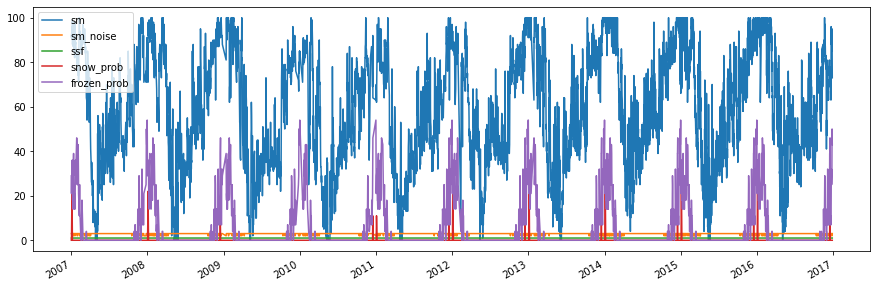

In [7]:
conf_flag_ok = h111_ts['conf_flag'] == 0

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
h111_ts[conf_flag_ok][fields].plot(ax=ax)
ax.legend()

### Differentiate between soil moisture from Metop satellites

The `sat_id` field can be used to differentiate between: Metop-A (`sat_id`=3), Metop-B (`sat_id`=4) and Metop-C (`sat_id=5`).

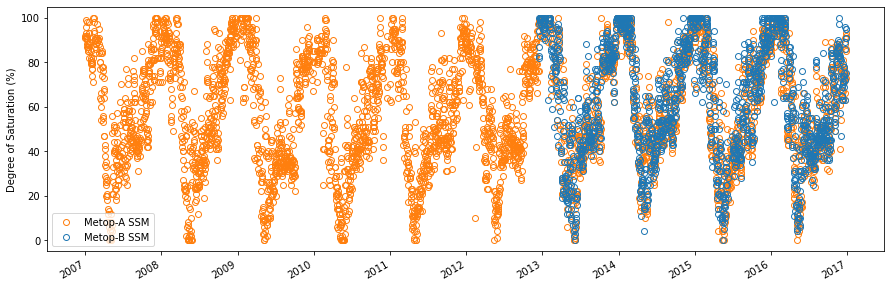

In [8]:
metop_a = h111_ts[conf_flag_ok]['sat_id'] == 3
metop_b = h111_ts[conf_flag_ok]['sat_id'] == 4

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
h111_ts[conf_flag_ok]['sm'][metop_a].plot(ax=ax, ls='none', marker='o', 
                                          color='C1', fillstyle='none', label='Metop-A SSM')
h111_ts[conf_flag_ok]['sm'][metop_b].plot(ax=ax, ls='none', marker='o', 
                                          color='C0', fillstyle='none', label='Metop-B SSM')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()

### Convert to absolute surface soil moisture

It is possible to convert relative surface soil moisture given in degree of saturation into absolute soil moisture ($m^3 m^{-3}$) using the `absolute_sm` keyword during reading. Porosity information provided by [Noah GLDAS](https://ldas.gsfc.nasa.gov/gldas/GLDASsoils.php) and pre-computed porosity from the [Harmonized World Soil Database (HWSD)](http://www.fao.org/soils-portal/soil-survey/soil-maps-and-databases/harmonized-world-soil-database-v12/en/) using the formulas of [Saxton and Rawls (2006)](https://dl.sciencesocieties.org/publications/sssaj/abstracts/70/5/1569) is used to produce volumetric surface soil moisture expressed in $m^{3} m^{-3}$.

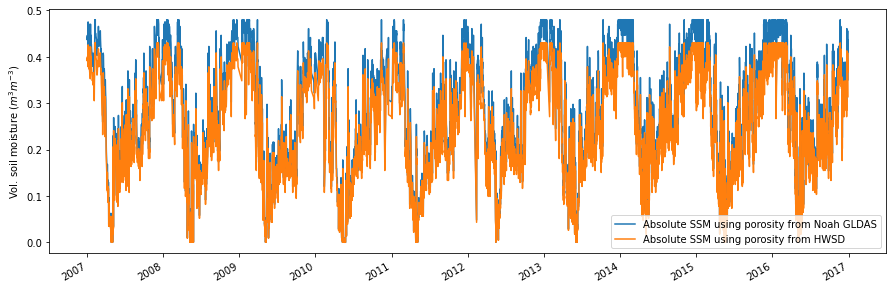

In [9]:
h111_ts = h111_dr.read(gpi, absolute_sm=True)
conf_flag_ok = h111_ts['conf_flag'] == 0

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
h111_ts[conf_flag_ok]['abs_sm_gldas'].plot(ax=ax, label='Absolute SSM using porosity from Noah GLDAS')
h111_ts[conf_flag_ok]['abs_sm_hwsd'].plot(ax=ax, label='Absolute SSM using porosity from HWSD')
ax.set_ylabel('Vol. soil moisture ($m^3 m^{-3}$)')
ax.legend()